In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("titanic")
df.dropna(inplace=True)
X = df.loc[:, (df.columns != "survived") & (df.columns != "alive")]
X = pd.get_dummies(X, drop_first=True)
y = df["survived"]


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

rf_model = RandomForestClassifier(random_state=0, ccp_alpha=0.02)
dt_model = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)

In [5]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

rf_scores = cross_val_score(rf_model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
dt_scores = cross_val_score(dt_model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)


       random forest  decision tree
count      15.000000      15.000000
mean        0.763514       0.750701
std         0.069703       0.092150
min         0.638889       0.555556
25%         0.722222       0.708333
50%         0.756757       0.750000
75%         0.810811       0.808559
max         0.864865       0.916667


<Axes: >

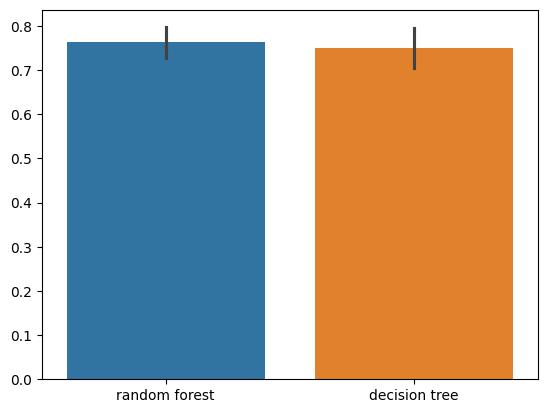

In [9]:
score_df = pd.DataFrame({"random forest": rf_scores, "decision tree": dt_scores})
print(score_df.describe())
sns.barplot(score_df)

In [11]:
from scipy import stats

stats.ttest_rel(score_df["random forest"], score_df["decision tree"])

TtestResult(statistic=0.9517151387117377, pvalue=0.35738431321019015, df=14)

<BarContainer object of 22 artists>

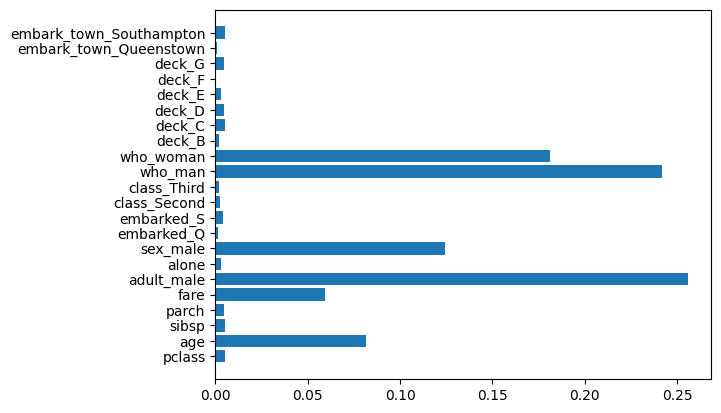

In [15]:
import matplotlib.pyplot as plt
rf_model.fit(X, y)
plt.barh(X.columns, rf_model.feature_importances_)